3. Import the required pachages with their cutomary aliases as follows:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4. Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [3]:
gdp_df = pd.read_csv("../data/gdp_percapita.csv")

In [4]:
print(gdp_df.head(5), "\n", gdp_df.tail(5))

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN 
      Country or Area  Year        Value  Value Footnotes
7657        Zimbabwe  1994  2670.106615              NaN
7658        Zimbabwe  1993  2458.783255              NaN
7659        Zimbabwe  1992  2468.278257              NaN
7660        Zimbabwe  1991  2781.787843              NaN
7661        Zimbabwe  1990  2704.757299              NaN


5.How many rows and columns are in gdp_df? What are the data types of each column?

In [8]:
print("Number of Rows: ", len(gdp_df.axes[0]), "\nNumber of Columns: ", len(gdp_df.axes[1]), "\n", gdp_df.dtypes)

Number of Rows:  7662 
Number of Columns:  4 
 Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


6. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [9]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [10]:
gdp_df = gdp_df.rename(columns={"Country or Area": "Country", "Year": "Year", "Value": "GDP_Per_Capita"})

7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?

In [11]:
y = len(pd.unique(gdp_df['Year'])) #This is how many years there are.

cnty = gdp_df['Country'].value_counts() #This will make a new df with the count of each country

count = 0 #This for loop goes through the new df and sees if a countries count equal how many years there were
for i in cnty:
    if i == y:
        count = count + 1
    else: count = count + 0
print(count, "countries have data every year\n")

gdp_df['Country'].value_counts().tail(40)

202 countries have data every year



Country
Hungary                      32
Lebanon                      32
Aruba                        32
Tonga                        32
Bhutan                       32
Slovak Republic              31
Kuwait                       31
Turkmenistan                 31
Cambodia                     30
West Bank and Gaza           29
Bosnia and Herzegovina       29
Latvia                       28
Israel                       28
Estonia                      28
Serbia                       28
Lithuania                    28
Iceland                      28
Moldova                      28
Maldives                     28
Croatia                      28
Slovenia                     28
Small states                 26
Montenegro                   26
San Marino                   25
Libya                        24
Timor-Leste                  23
Liberia                      23
Other small states           23
Qatar                        23
Palau                        22
CuraÃ§ao                     22


34 countries were created after 1990, 2 countries are not in the UN, this means 11 countries either left or cease to exist

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot.

In [12]:
##This df is a subset of the gdp_df where the year is 2020.
grph_df = gdp_df[gdp_df["Year"] == 2020]
grph_df = grph_df.drop(columns = ['Year'])

<function matplotlib.pyplot.show(close=None, block=None)>

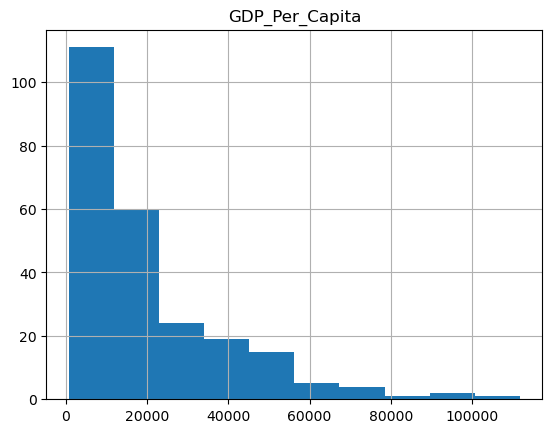

In [13]:
##This is the histogram code
grph_df.hist()
plt.show

<Axes: ylabel='Density'>

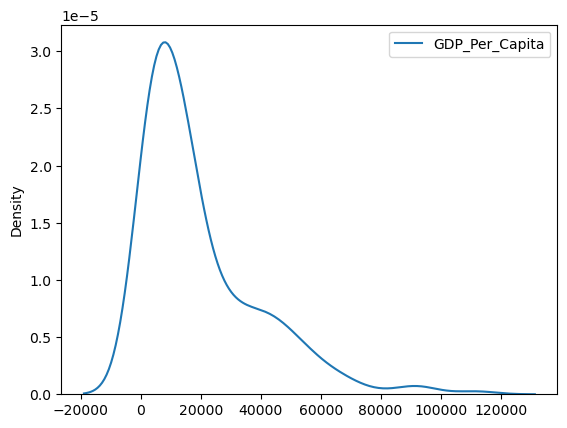

In [14]:
##This the density plot code
sns.kdeplot(data=grph_df)

<Axes: >

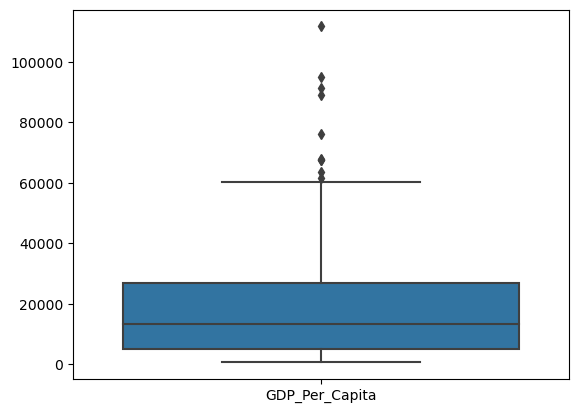

In [15]:
##This is the boxplot code
sns.boxplot(data=grph_df)

<Axes: >

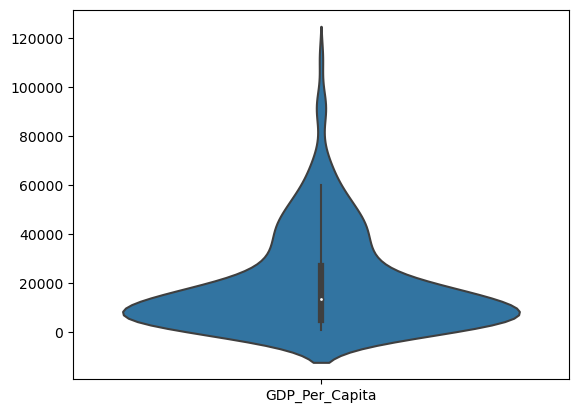

In [16]:
##This is the violin plot code
sns.violinplot(data=grph_df)

What do you notice when you look at these plots?
-Most countries have a GDP Per Capita below 20k
How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?
-The box plot and violin plot shows median and quartiles

9. What was the median GDP per capita value in 2020?

In [22]:
##This will print the median GDP per capita in 2020
print("$", "{0:,.2f}".format(np.median(grph_df["GDP_Per_Capita"]), 2), "is the median GDP per capita")

$ 13,358.00 is the median GDP per capita


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

    A boxplot\
    A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn) \
    A scatterplot\
    A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn) \
    Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.



In [17]:
##This code will subset the df to just the years 1990, 2000, 2010, 2020
gdp_decades = gdp_df[(gdp_df["Year"] == 1990) | (gdp_df["Year"] == 2000) | (gdp_df["Year"] == 2010) | (gdp_df["Year"] == 2020)]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

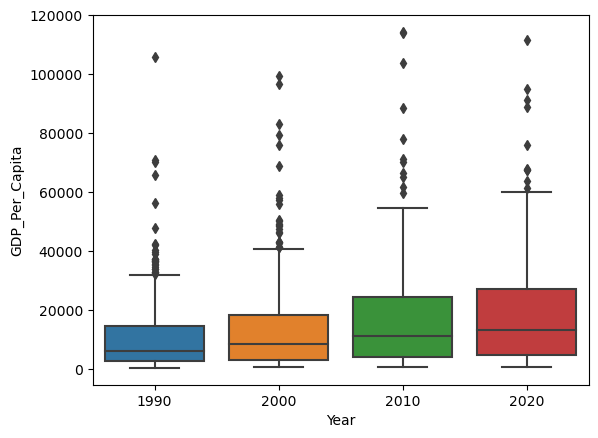

In [18]:
##This is the boxplot code
sns.boxplot(data = gdp_decades, x = gdp_decades["Year"], y = gdp_decades["GDP_Per_Capita"])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

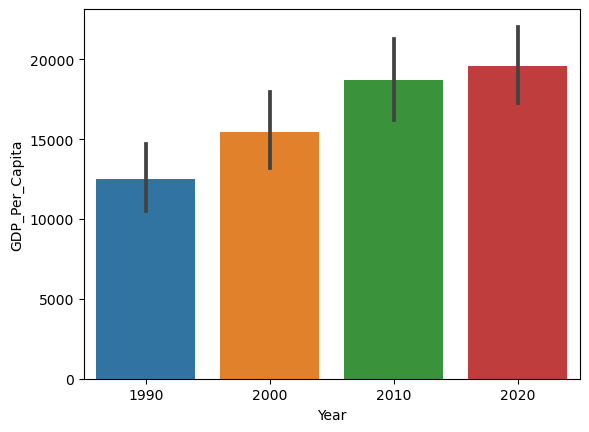

In [19]:
##This is the barplot code
sns.barplot(data = gdp_decades, x = gdp_decades["Year"], y = gdp_decades["GDP_Per_Capita"])

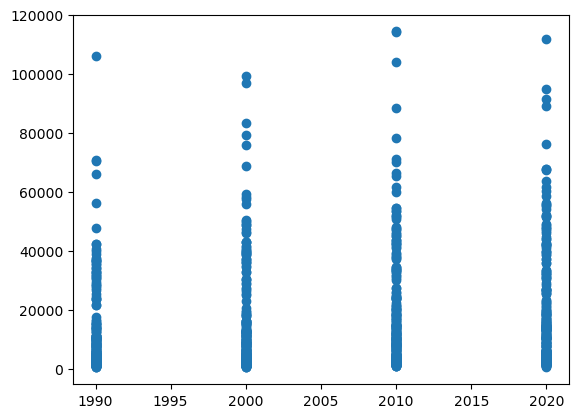

In [20]:
#This the the scatterplot w/o trendline code
plt.scatter(x = gdp_decades["Year"], y = gdp_decades["GDP_Per_Capita"])
plt.show()

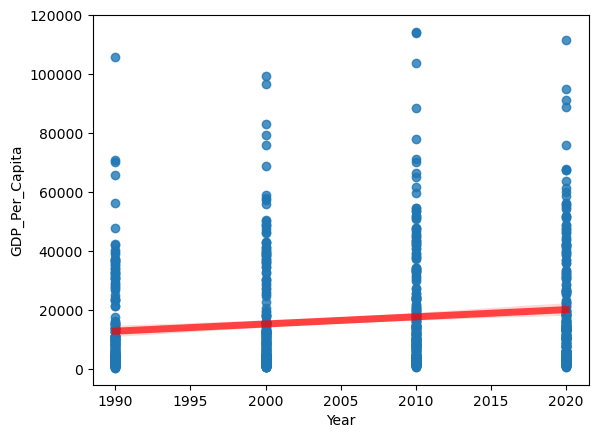

In [21]:
##This is the scatterplot w/ trendline code
sns.regplot(x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.show()

11.Which country was the first to have a GDP per capita greater than $100,000?

In [23]:
##First I will filter the df by GDPpC over 100k
foo_df = gdp_df[gdp_df["GDP_Per_Capita"] >= 100000]
##Secondly I will filter based on the min year in foo_df
bar_df = foo_df[foo_df["Year"] == min(foo_df["Year"])]
##Lastly I will print the first country to have a GDPpC over 100k
print("The following is the first country to have a GDP per capita greater than $100,000:\n", bar_df)

The following is the first country to have a GDP per capita greater than $100,000:
                    Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [24]:
##Since I already have a df for 2020 I will filter out the highest GDPpC
mx_df = grph_df[grph_df["GDP_Per_Capita"] == max(grph_df["GDP_Per_Capita"])]
print("The following is the country with the highest GDP per capita for the year 2020:\n", mx_df)

The following is the country with the highest GDP per capita for the year 2020:
          Country  GDP_Per_Capita
4148  Luxembourg   111751.314751


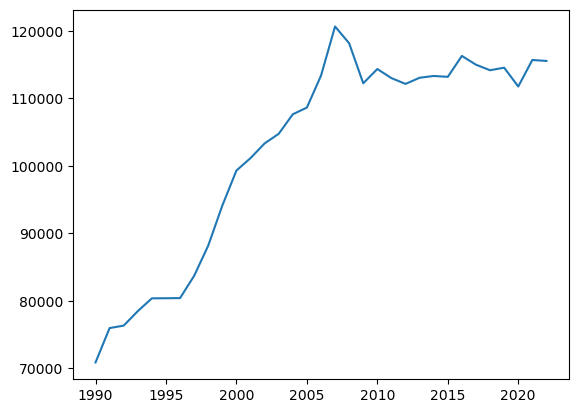

In [25]:
##This will plot the change in GDPpC for Luxembourg
ln_df = gdp_df[gdp_df["Country"] == "Luxembourg"]
plt.plot(ln_df["Year"], ln_df["GDP_Per_Capita"])
plt.show()

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?

In [26]:
mn_df = grph_df[grph_df["GDP_Per_Capita"] == min(grph_df["GDP_Per_Capita"])]
print("The following is the country with the lowest GDP per capita for the year 2020:\n", mn_df)

The following is the country with the lowest GDP per capita for the year 2020:
      Country  GDP_Per_Capita
973  Burundi      711.355263


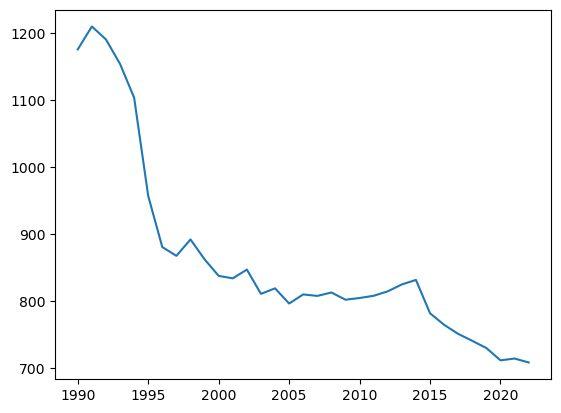

In [27]:
##This will plot the change in GDPpC for Luxembourg
lne_df = gdp_df[gdp_df["Country"] == "Burundi"]
plt.plot(lne_df["Year"], lne_df["GDP_Per_Capita"])
plt.show()

14. Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [31]:
internet_df = pd.read_csv("../data/internet_use.csv", skiprows=0, nrows = 4495)

In [32]:
print(internet_df.head(5), "\n", internet_df.tail(5))
print(internet_df.dtypes)

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN 
      Country or Area  Year     Value  Value Footnotes
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN
Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


15. Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [33]:
internet_df = internet_df.drop(columns = ['Value Footnotes'])

In [34]:
internet_df = internet_df.rename(columns={"Country or Area": "Country", "Year": "Year", "Value": "Internet_User_Pct"})

16. Look at the number of observations in this dataset per year.

In [35]:
##This will print how many times each year is in the df
print(internet_df['Year'].value_counts().sort_index())

Year
1960      7
1965      7
1970      7
1975      7
1976      7
1977      7
1978      7
1979      7
1980      7
1981      7
1982      7
1983      7
1984      7
1985      7
1986      7
1987      7
1988      7
1989      8
1990    210
1991     39
1992     50
1993     65
1994     91
1995    138
1996    175
1997    184
1998    190
1999    198
2000    199
2001    201
2002    202
2003    196
2004    199
2005    201
2006    200
2007    206
2008    204
2009    203
2010    203
2011    207
2012    203
2013    202
2014    202
Name: count, dtype: int64


What do you notice?
-I notice that there are years with counts before the internet was a thing

17. What is the first year to have a non-zero internet users percentage value?

In [36]:
nz_df = internet_df[internet_df["Internet_User_Pct"] > 0]
print("The first year to have a non-zero IUP is", min(nz_df["Year"]))

The first year to have a non-zero IUP is 1990


18. How does the distribution of internet users percent differ for 2000 and 2014?

In [37]:
##This will create a df that I will then use to graph the distrubution
frst_df = internet_df[(internet_df["Year"] == 2000) | (internet_df["Year"] == 2014)]

Text(0.5, 1.0, 'Internet User Percent Distribution 2000 vs 2014')

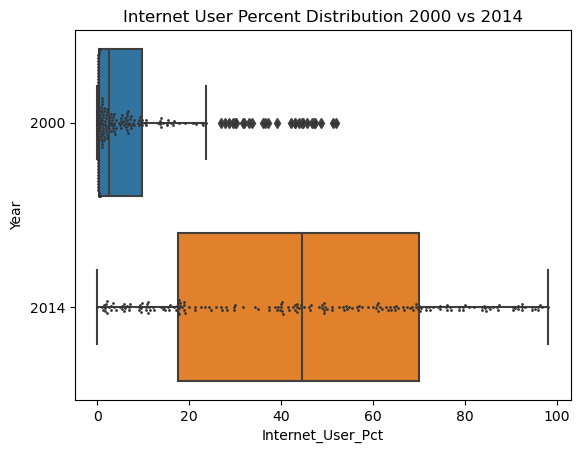

In [38]:
##This will plot the distributions
sns.boxplot(x = frst_df["Internet_User_Pct"], y = frst_df["Year"], orient='h')
sns.swarmplot(x = frst_df["Internet_User_Pct"], y = frst_df["Year"],color='.2', size=2, orient='h')

##Adding title
plt.title("Internet User Percent Distribution 2000 vs 2014")

19. For how many countries was the percentage of internet users below 5% in 2014?

In [39]:
cnt = 0
for index, row in frst_df.iterrows():
    if row["Year"] == 2014 and row["Internet_User_Pct"] < 5:
        cnt = cnt + 1
print("There are", cnt, "countries with a percentage of internet users below 5% in 2014")

There are 16 countries with a percentage of internet users below 5% in 2014


20. Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.

In [40]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer', on=['Country', 'Year'])
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Internet_User_Pct
0     Afghanistan  2021     1517.016266                NaN
1     Afghanistan  2020     1968.341002                NaN
2     Afghanistan  2019     2079.921861                NaN
3     Afghanistan  2018     2060.698973                NaN
4     Afghanistan  2017     2096.093111                NaN
...           ...   ...             ...                ...
8731        Yemen  1999             NaN           0.056629
8732        Yemen  1998             NaN           0.023323
8733        Yemen  1997             NaN           0.015025
8734        Yemen  1996             NaN           0.000621
8735        Yemen  1990             NaN           0.000000

[8736 rows x 4 columns]


21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

C:\Users\jdejr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


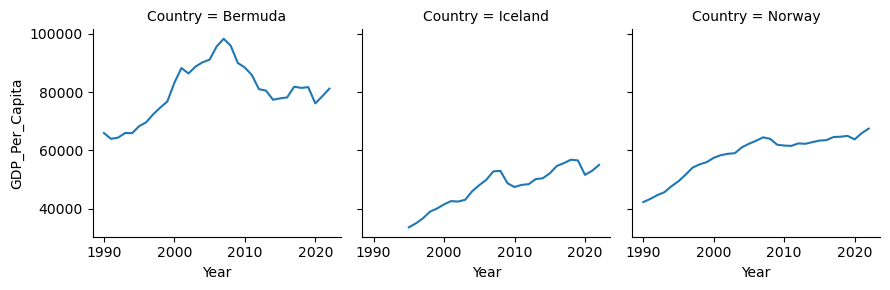

In [41]:
##This will filter out 2014
lst_df = gdp_and_internet_use[gdp_and_internet_use["Year"] == 2014]
##This will find the top three
top_df = lst_df.nlargest(3, 'Internet_User_Pct')
##Comment to clarify below
fac_df = gdp_and_internet_use[gdp_and_internet_use["Country"].isin(top_df["Country"])]
##This is to graph three lineplots via FacetGrid
g = sns.FacetGrid(data = fac_df, col="Country")
g.map_dataframe(sns.lineplot,x="Year", y="GDP_Per_Capita")

22. Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.

In [42]:
##The was completed earlier
gdp_and_internet_use_2014 = lst_df

23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

<Axes: xlabel='Internet_User_Pct', ylabel='GDP_Per_Capita'>

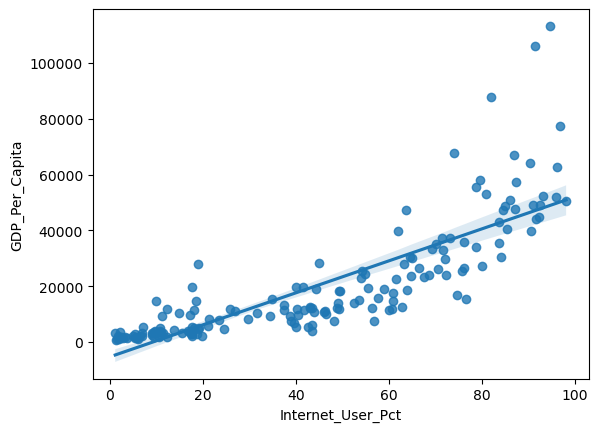

In [43]:
sns.regplot(data=gdp_and_internet_use_2014, x="Internet_User_Pct", y="GDP_Per_Capita")

24. Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

In [54]:
gdp_and_internet_use_2014["GDP_group"] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], 3, labels=["bad", "medium", "good"])

C:\Users\jdejr\AppData\Local\Temp\ipykernel_25936\3671656845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014["GDP_group"] = pd.qcut(gdp_and_internet_use_2014["GDP_Per_Capita"], 3, labels=["bad", "medium", "good"])


25. Stretch Question: How does the median internet users percentage compare for the three gdp groups?

<Axes: xlabel='Internet_User_Pct', ylabel='GDP_group'>

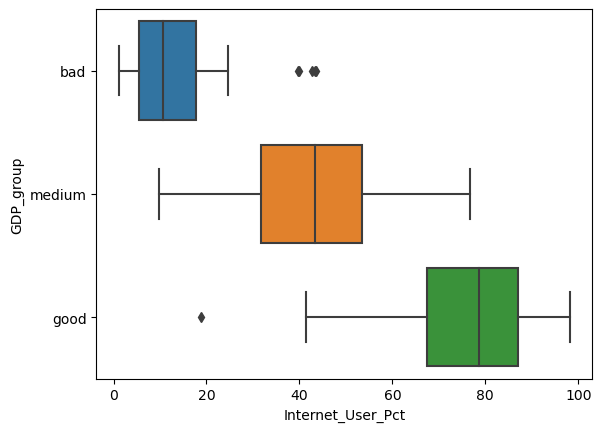

In [55]:
##This is to graph three lineplots via FacetGrid
sns.boxplot(x = gdp_and_internet_use_2014["Internet_User_Pct"], y = gdp_and_internet_use_2014["GDP_group"], orient='h')

The internet usage median for one step higher is higher than the upper bound of the group below it(i.e. the 'medium' group's median is higher than the 'bad' group's upper limit)

Bonus exercise:

   1. Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.


In [56]:
adult_lit = pd.read_csv("../data/adult_literacy.csv",  skiprows=0, nrows = 480)

In [57]:
adult_lit = adult_lit.drop(columns = ['Source', 'Unit', 'Value Footnotes'])

print(adult_lit)

    Country or Area       Subgroup  Year  Value
0       Afghanistan  Female 15+ yr  2000   12.6
1       Afghanistan    Male 15+ yr  2000   43.1
2           Albania  Female 15+ yr  2001   98.3
3           Albania    Male 15+ yr  2001   99.2
4           Algeria  Female 15+ yr  2002   60.1
..              ...            ...   ...    ...
475          Zambia    Male 15+ yr  1990   73.0
476        Zimbabwe  Female 15+ yr  2004   86.2
477        Zimbabwe  Female 15+ yr  1992   78.5
478        Zimbabwe    Male 15+ yr  2004   92.7
479        Zimbabwe    Male 15+ yr  1992   88.9

[480 rows x 4 columns]


In [58]:
adult_lit = adult_lit.rename(columns={"Country or Area": "Country","Subgroup" : "Subgroup", "Year": "Year", "Value": "Literacy_Pct"})
print(adult_lit)

         Country       Subgroup  Year  Literacy_Pct
0    Afghanistan  Female 15+ yr  2000          12.6
1    Afghanistan    Male 15+ yr  2000          43.1
2        Albania  Female 15+ yr  2001          98.3
3        Albania    Male 15+ yr  2001          99.2
4        Algeria  Female 15+ yr  2002          60.1
..           ...            ...   ...           ...
475       Zambia    Male 15+ yr  1990          73.0
476     Zimbabwe  Female 15+ yr  2004          86.2
477     Zimbabwe  Female 15+ yr  1992          78.5
478     Zimbabwe    Male 15+ yr  2004          92.7
479     Zimbabwe    Male 15+ yr  1992          88.9

[480 rows x 4 columns]


In [59]:
gdp_internet_adlit = gdp_and_internet_use.merge(adult_lit, how='inner', on=['Country', 'Year'])
print(gdp_internet_adlit)

       Country  Year  GDP_Per_Capita  Internet_User_Pct       Subgroup  \
0      Albania  2001     6441.440698           0.325798  Female 15+ yr   
1      Albania  2001     6441.440698           0.325798    Male 15+ yr   
2      Algeria  2002     9299.682134           1.591641  Female 15+ yr   
3      Algeria  2002     9299.682134           1.591641    Male 15+ yr   
4       Angola  2001     4768.008894           0.136014  Female 15+ yr   
..         ...   ...             ...                ...            ...   
385  Venezuela  2001             NaN           4.636001    Male 15+ yr   
386  Venezuela  1990             NaN           0.000000  Female 15+ yr   
387  Venezuela  1990             NaN           0.000000    Male 15+ yr   
388      Yemen  2004             NaN           0.881223  Female 15+ yr   
389      Yemen  2004             NaN           0.881223    Male 15+ yr   

     Literacy_Pct  
0            98.3  
1            99.2  
2            60.1  
3            79.6  
4          

In [60]:
gdp_internet_adlit = gdp_internet_adlit.dropna()
print(gdp_internet_adlit)

      Country  Year  GDP_Per_Capita  Internet_User_Pct       Subgroup  \
0     Albania  2001     6441.440698           0.325798  Female 15+ yr   
1     Albania  2001     6441.440698           0.325798    Male 15+ yr   
2     Algeria  2002     9299.682134           1.591641  Female 15+ yr   
3     Algeria  2002     9299.682134           1.591641    Male 15+ yr   
4      Angola  2001     4768.008894           0.136014  Female 15+ yr   
..        ...   ...             ...                ...            ...   
351    Zambia  1999     2074.453663           0.147053    Male 15+ yr   
352    Zambia  1990     2290.039226           0.000000  Female 15+ yr   
353    Zambia  1990     2290.039226           0.000000    Male 15+ yr   
354  Zimbabwe  2004     1934.164642           6.564045  Female 15+ yr   
355  Zimbabwe  2004     1934.164642           6.564045    Male 15+ yr   

     Literacy_Pct  
0            98.3  
1            99.2  
2            60.1  
3            79.6  
4            54.2  
.. 

C:\Users\jdejr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


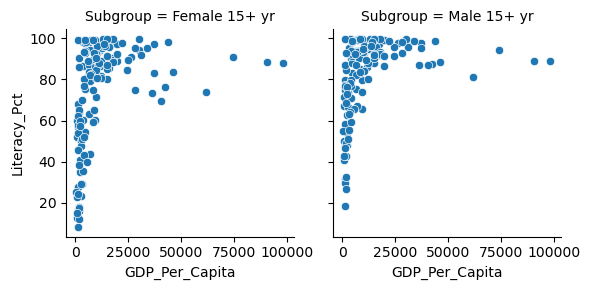

In [61]:
g = sns.FacetGrid(data = gdp_internet_adlit, col="Subgroup")
g.map_dataframe(sns.scatterplot,x="GDP_Per_Capita", y="Literacy_Pct")

C:\Users\jdejr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


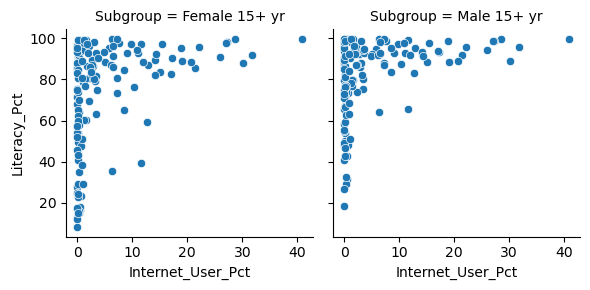

In [62]:
g = sns.FacetGrid(data = gdp_internet_adlit, col="Subgroup")
g.map_dataframe(sns.scatterplot,x="Internet_User_Pct", y="Literacy_Pct")

C:\Users\jdejr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


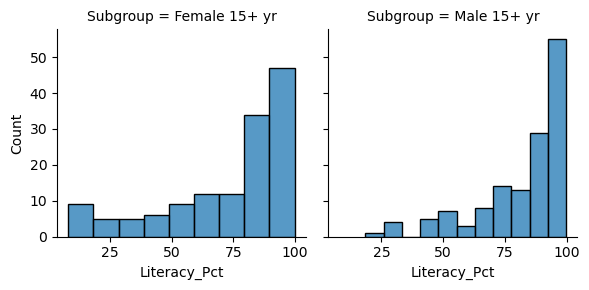

In [63]:
g = sns.FacetGrid(data = gdp_internet_adlit, col="Subgroup")
g.map_dataframe(sns.histplot,x="Literacy_Pct")